<a href="https://colab.research.google.com/github/sarahmagdi/ml1_project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install mediapipe

In [2]:
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import mediapipe
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow

In [4]:
# Loading AFLW2000 Data
%%capture
if os.path.isfile('/content/AFLW2000-3D.zip') == False:
  !gdown --id  1fP3zvSCYjll_o_m7S12nvQLZ9MnsEoap
  !unzip /content/AFLW2000-3D.zip

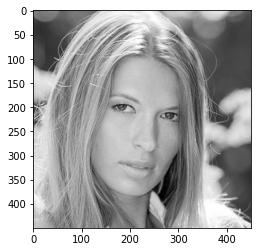

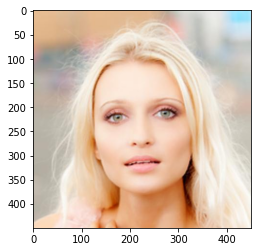

['/content/AFLW2000/image00595.jpg', '/content/AFLW2000/image00972.jpg']

In [190]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# save all  names of images files  with 
#make sure the path (AFLW2000-3D)
imgs_pathes_list = glob.glob('/content/AFLW2000/*.jpg')

# loop through the list and show the image to certain image is red
for path in imgs_pathes_list[:2]:
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # to convert BGR image to RGB because cv2 read images as BGR formate
    plt.imshow(image)
    plt.show()
    #cv2_imshow(image)
    
    

imgs_pathes_list[0:2]   

In [ ]:
img_name = path.split('.jpg')[0]
print(img_name)

/content/AFLW2000/image02076


In [7]:
#to get name without extension
#img_name = path.split('.jpg')[0]
# add the .mat extension
#path_mat = img_name + '.mat'
random_file = 'image00053'

faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
    # processing the face to extract the landmark points (468 point) for each x,y,z 
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks != None: 
      # looping over the faces in the image
      for face in results.multi_face_landmarks:
          face.landmark
          break
      

In [183]:
#i used it to choice landmarks manually but  it no sufficient

In [ ]:
image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')


In [ ]:
ls=[11,13,16,17,19,31,32,33,34,35,36,37,60,94,96,112,114,127,129,130,131,132,140,143,144,148,152,157,179,217 ,218,219,220,221,246,248,249 ,251,252 ,262,302,336,338,339,354,356,369,371,372,373,374,382,385,386,376,377,378,379,400,382,385,386,390,394,399 ]


In [ ]:
x=list(range(42, 57,1))
y=list(range(63,72,1))
z=list(range(79,88,1))
w=list(range(99,110,1))
w2=list(range(116,125,1))
w3=list(range(134,138,1))
w4=list(range(165,168,1))
w5=list(range(180,195,1))
w6=list(range(199,215,1))
w7=list(range(228 ,235,1))
w8=list(range(237,244,1))
w9=list(range(264,271,1))
w10=list(range(284,296,1))
w10=list(range(305,314,1))
w11=list(range(305,314,1))
w12=list(range(321,330,1))
w13=list(range(341,352,1))
w14=list(range(358,267,1))
w15=list(range(376,380,1))
w16=list(range(407,410,1))
w17=list(range(422,437,1))
w18=list(range(441,457,1))
w19=list(range(459,463,1))


In [ ]:
ls.extend(x)
ls.extend(y)
ls.extend(z)
ls.extend(w)
ls.extend(w2)
ls.extend(w3)
ls.extend(w4)
ls.extend(w5)
ls.extend(w6)
ls.extend(w7)
ls.extend(w8)
ls.extend(w9)
ls.extend(w10)
ls.extend(w11)
ls.extend(w12)
ls.extend(w13)
ls.extend(w14)
ls.extend(w15)
ls.extend(w16)
ls.extend(w17)
ls.extend(w18)
ls.extend(w19)


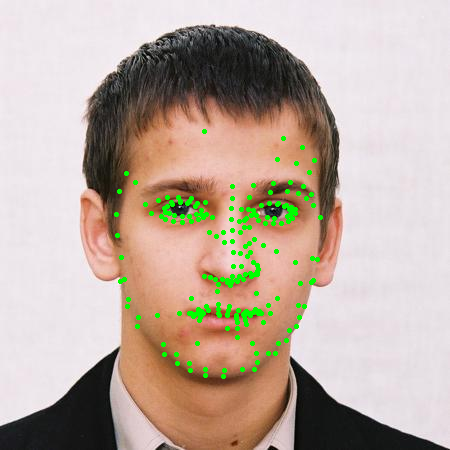

In [ ]:
i=1
for landmark in face.landmark:
              if i in ls:
                i+=1
                continue  
              x = landmark.x
              y = landmark.y
              # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
              shape = image.shape 
              relative_x = int(x * shape[1])
              relative_y = int(y * shape[0])
              # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
              cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
              i+=1
cv2_imshow(image)

In [184]:
#face.landmark

In [8]:
#to extract landmarks  (468 3D face landmarks)
faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
all_featuresANDlabels=[]
#img_landmarks=[]
with faceModule.FaceMesh(static_image_mode=True) as faces:
   
    for path in imgs_pathes_list:
        img_landmarks=[] 
          # to load and read image
        image = cv2.imread(path)
        # processing the face to extract the landmark points (468 point) for each x,y,z 
        results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.multi_face_landmarks != None: 
          # looping over the faces in the image
          for face in results.multi_face_landmarks:
              for landmark in face.landmark:
                img_landmarks.extend([landmark.x, landmark.y])
              break #to take first face only
        #to get name without extension
        img_name = path.split('.jpg')[0]
        # add the .mat extension
        path_mat = img_name + '.mat'
        data = sio.loadmat(path_mat)
        labels = data['Pose_Para'][0][:3]#pitch,yaw,roll
        #img_landmarks.extend(labels)
        pitch = labels[0]
        yaw = labels[1]
        roll = labels[2]
        img_landmarks.extend([pitch,yaw,roll])
        all_featuresANDlabels.append(img_landmarks)  

                  

In [251]:
columns_name = [['x' + str(i),'y' + str(i)] for i in range(len(face.landmark))]
columns_name=np.array(columns_name)
x=columns_name.reshape(1,-1)[0].tolist()
x.extend(['pitch','yaw','roll'])
print(x)


['x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15', 'x16', 'y16', 'x17', 'y17', 'x18', 'y18', 'x19', 'y19', 'x20', 'y20', 'x21', 'y21', 'x22', 'y22', 'x23', 'y23', 'x24', 'y24', 'x25', 'y25', 'x26', 'y26', 'x27', 'y27', 'x28', 'y28', 'x29', 'y29', 'x30', 'y30', 'x31', 'y31', 'x32', 'y32', 'x33', 'y33', 'x34', 'y34', 'x35', 'y35', 'x36', 'y36', 'x37', 'y37', 'x38', 'y38', 'x39', 'y39', 'x40', 'y40', 'x41', 'y41', 'x42', 'y42', 'x43', 'y43', 'x44', 'y44', 'x45', 'y45', 'x46', 'y46', 'x47', 'y47', 'x48', 'y48', 'x49', 'y49', 'x50', 'y50', 'x51', 'y51', 'x52', 'y52', 'x53', 'y53', 'x54', 'y54', 'x55', 'y55', 'x56', 'y56', 'x57', 'y57', 'x58', 'y58', 'x59', 'y59', 'x60', 'y60', 'x61', 'y61', 'x62', 'y62', 'x63', 'y63', 'x64', 'y64', 'x65', 'y65', 'x66', 'y66', 'x67', 'y67', 'x68', 'y68', 'x69', 'y69', 'x70', 'y70', 'x71', 'y71', 'x72', 'y72

In [10]:
df =pd.DataFrame(all_featuresANDlabels,columns = x)

df.head(5)

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y464,x465,y465,x466,y466,x467,y467,pitch,yaw,roll
0,0.510301,0.705174,0.539955,0.637258,0.521339,0.651402,0.526380,0.556619,0.545696,0.616022,...,0.496514,0.565178,0.502666,0.665532,0.484771,0.673633,0.481386,-0.297849,-0.202252,0.193086
1,0.496543,0.676518,0.490750,0.606071,0.494637,0.629771,0.473451,0.539933,0.489455,0.584179,...,0.494036,0.528563,0.496846,0.647391,0.470059,0.657674,0.463056,0.075391,0.066288,-0.076080
2,0.508726,0.672566,0.506480,0.612537,0.506519,0.626895,0.489819,0.552107,0.505869,0.595384,...,0.502198,0.528996,0.506480,0.618540,0.486023,0.626760,0.478864,-0.131794,0.011347,-0.020842
3,0.430302,0.627628,0.404915,0.573253,0.437721,0.597468,0.429249,0.532822,0.404812,0.558316,...,0.511522,0.493457,0.512846,0.569068,0.510750,0.580133,0.505476,0.688345,1.207175,0.414514
4,0.476873,0.671305,0.500210,0.627153,0.492089,0.639333,0.512359,0.552763,0.508868,0.607941,...,0.522037,0.577065,0.524026,0.688936,0.546657,0.701277,0.543878,-0.138380,0.087130,0.405625


In [ ]:
len(df)

2000

In [ ]:
len(imgs_pathes_list)

2000

In [11]:
df2=df.dropna()

In [ ]:
df2.head(5)

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y464,x465,y465,x466,y466,x467,y467,pitch,yaw,roll
0,0.510301,0.705174,0.539955,0.637258,0.521339,0.651402,0.526380,0.556619,0.545696,0.616022,...,0.496514,0.565178,0.502666,0.665532,0.484771,0.673633,0.481386,-0.297849,-0.202252,0.193086
1,0.496543,0.676518,0.490750,0.606071,0.494637,0.629771,0.473451,0.539933,0.489455,0.584179,...,0.494036,0.528563,0.496846,0.647391,0.470059,0.657674,0.463056,0.075391,0.066288,-0.076080
2,0.508726,0.672566,0.506480,0.612537,0.506519,0.626895,0.489819,0.552107,0.505869,0.595384,...,0.502198,0.528996,0.506480,0.618540,0.486023,0.626760,0.478864,-0.131794,0.011347,-0.020842
3,0.430302,0.627628,0.404915,0.573253,0.437721,0.597468,0.429249,0.532822,0.404812,0.558316,...,0.511522,0.493457,0.512846,0.569068,0.510750,0.580133,0.505476,0.688345,1.207175,0.414514
4,0.476873,0.671305,0.500210,0.627153,0.492089,0.639333,0.512359,0.552763,0.508868,0.607941,...,0.522037,0.577065,0.524026,0.688936,0.546657,0.701277,0.543878,-0.138380,0.087130,0.405625


In [ ]:
'''
drop_columns_name = [['x' + str(i),'y' + str(i)] for i in ls]
drop_columns_name
drop_columns_name=np.array(drop_columns_name)
drop_columns_name=drop_columns_name.reshape(1,-1)[0].tolist()
'''

In [ ]:
'''
for j in drop_columns_name[:]:
        if j in x:
            x.remove(j)
            
#df2.drop(drop_columns_name, axis=1, inplace=True)
  '''

In [ ]:
print(len(ls)*2)
len(drop_columns_name)

514


514

In [13]:
len(df2.columns)

939

In [185]:

#x[0:937]

In [70]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(df2[x[0:936]], df2[['pitch','yaw','roll']], test_size=0.2, random_state=42)
labels_train.head(5)

,pitch,yaw,roll
884,-0.085738,-0.404924,0.278171
263,0.036318,-0.447323,-0.115917
1325,-0.317595,-1.168614,0.382536
1767,-0.207506,-0.817491,0.363930
1167,-0.086928,-0.954173,0.240022


In [ ]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482 entries, 884 to 1216
Columns: 454 entries, x0 to y467
dtypes: float64(454)
memory usage: 5.1 MB


In [69]:
#for selecting best features but it no sufficient
'''
from sklearn.decomposition import PCA
pca = PCA(n_components= 68)
fit = pca.fit(features_train)
features_train=fit.transform(features_train)
features_test=fit.transform(features_test)
'''

In [58]:
#i used it to overcome overfitting but it no sufficient
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.3,solver='svd')
reg.fit(features_train, labels_train['pitch'])
print(reg.score(features_test,labels_test['pitch']))
print(reg.score(features_train,labels_train['pitch']))
y_predict=reg.predict(features_test)
y_predictt=reg.predict(features_train)

0.6079378479468578
0.16618038142254044


In [182]:
# Import xgboost regression model
#gamma=0, validate_parameters =  True,subsample=0.8, colsample_bytree=0.5,max_depth=5, min_child_weight=1 to handel over fitting
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score



[22:34:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [191]:
#yaw
model2 = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=7, min_child_weight=0, gamma=0, validate_parameters = True,subsample=0.9, colsample_bytree=0.5, nthread=4, seed=42).fit(features_train, labels_train['yaw'])

y_train_pred_yaw = model2.predict(features_train)
y_test_pred_yaw = model2.predict(features_test)


[22:57:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [193]:
print('\\\\\\\\\\\\\\\\\\\\\\ yaw /////////////////////')
print('Mean Squared Error:', mean_squared_error(labels_train['yaw'] ,y_train_pred_yaw ))
print('R2 Score:', r2_score(labels_train['yaw'],y_train_pred_yaw ))
print('Mean Squared Error:', mean_squared_error(labels_test['yaw'] ,y_test_pred_yaw ))
print('R2 Score:', r2_score(labels_test['yaw'], y_test_pred_yaw ))


\\\\\\\\\\\ yaw /////////////////////
Mean Squared Error: 1.9598045188855173e-07
R2 Score: 0.9999994086512456
Mean Squared Error: 0.02303912583403973
R2 Score: 0.9352574045332833


In [223]:
#pitch
model1 = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=7, min_child_weight=0, gamma=0, validate_parameters = True,subsample=0.9, colsample_bytree=0.5, nthread=4, seed=42).fit(features_train, labels_train['pitch'])

y_pred_train = model1.predict(features_train)
y_pred_pitch = model1.predict(features_test)


[23:34:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [224]:
print('\\\\\\\\\\\\\\\\\\\\\\ Pitch /////////////////////')
print('Mean Squared Error:', mean_squared_error(labels_train['pitch'] ,y_pred_train ))
print('R2 Score:', r2_score(labels_train['pitch'],y_pred_train ))
print('Mean Squared Error:', mean_squared_error(labels_test['pitch'] ,y_pred_pitch ))
print('R2 Score:', r2_score(labels_test['pitch'], y_pred_pitch ))


\\\\\\\\\\\ Pitch /////////////////////
Mean Squared Error: 1.9211140797059265e-07
R2 Score: 0.9999994587338965
Mean Squared Error: 0.02828926612514228
R2 Score: 0.67934585107485


In [229]:
model3 = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=2, min_child_weight=0, gamma=0, validate_parameters = True,subsample=0.9, colsample_bytree=0.5, nthread=4, seed=42).fit(features_train, labels_train['roll'])

y_train_pred_roll = model3.predict(features_train)
y_test_pred_roll = model3.predict(features_test)


[23:36:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [230]:
print('\\\\\\\\\\\\\\\\\\\\\\ roll /////////////////////')
print('Mean Squared Error:', mean_squared_error(labels_train['roll'] ,y_train_pred_roll ))
print('R2 Score:', r2_score(labels_train['roll'],y_train_pred_roll ))
print('Mean Squared Error:', mean_squared_error(labels_test['roll'] ,y_test_pred_roll ))
print('R2 Score:', r2_score(labels_test['roll'], y_test_pred_roll ))


\\\\\\\\\\\ roll /////////////////////
Mean Squared Error: 0.0037018782743502942
R2 Score: 0.9924498891374512
Mean Squared Error: 0.04006552894587617
R2 Score: 0.7243123595098536


In [186]:
#function to draw the lines on image
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

In [237]:
l=df.head(1)[['pitch','yaw','roll']]


In [240]:
l["pitch"][0]

-0.29784929752349854

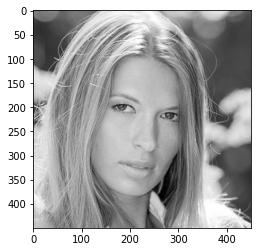

In [243]:

image = cv2.imread(imgs_pathes_list[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # to convert BGR image to RGB because cv2 read images as BGR formate
plt.imshow(image)
plt.show()

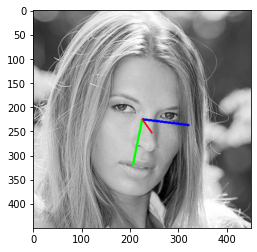

In [244]:
img=draw_axis(image,l["pitch"][0],l["yaw"][0],l["roll"][0], tdx=None, tdy=None, size = 100)
plt.imshow(img)
plt.show()


In [262]:
feat=df.head(1)
p=model1.predict(feat[x[0:936]])
y=model2.predict(feat[x[0:936]])
r=p=model3.predict(feat[x[0:936]])
print(y[0],r[0])

-0.20239955 0.17633915


In [260]:
print(l["yaw"][0])
print(l["roll"][0])

-0.20225226879119873
0.1930859088897705


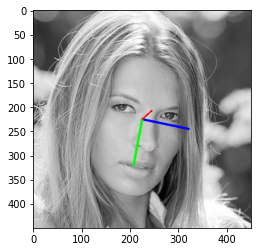

In [259]:
image = cv2.imread(imgs_pathes_list[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # to convert BGR image to RGB because cv2 read images as BGR formate
img=draw_axis(image,p[0],y[0],r[0], tdx=None, tdy=None, size = 100)
plt.imshow(img)
plt.show()


In [3]:
import cv2
import cv2

cap = cv2.VideoCapture('test.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [10]:
# Create an object to read
# from camera
video = cv2.VideoCapture('/content/MyDrive/ML1/test.mp4')

# We need to check if camera
# is opened previously or not
if (video.isOpened() == False):
    print("Error reading video file")

# We need to set resolutions.
# so, convert them from float to integer.
frame_width = int(video.get(3))
frame_height = int(video.get(4))

size = (frame_width, frame_height)

# Below VideoWriter object will create
# a frame of above defined The output
# is stored in 'output.avi' file.
result = cv2.VideoWriter('/content/MyDrive/ML1/output.mp4',
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         10, size)
while(True):
    ret, frame = video.read()

    if ret == True:

        # Write the frame into the
        # file 'output.avi'
        result.write(frame)

        # Display the frame
        # saved in the file
        cv2.imshow('Frame', frame)

        # Press S on keyboard
        # to stop the process
        if cv2.waitKey('q') & 0xFF == ord(1):
            break

    # Break the loop
    else:
        break
# When everything done, release
# the video capture and video
# write objects
video.release()
result.release()

# Closes all the frames
cv2.destroyAllWindows()

print("The video was successfully saved")


Error reading video file
The video was successfully saved
